<a href="https://colab.research.google.com/github/ayushjain1144/semantic-segmentation-IGCAR/blob/master/bert_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pytorch-pretrained-bert

In [0]:
import torch
from pytorch_pretrained_bert import BertTokenizer,\
     BertModel, BertForMaskedLM

In [0]:
import logging
logging.basicConfig(level=logging.INFO)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

INFO:pytorch_pretrained_bert.tokenization:loading vocabulary file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt from cache at /root/.pytorch_pretrained_bert/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084


In [0]:
text = "Here is the sentence I want embeddings for."
text = "After stealing money from the bank vault, the bank robber was seen fishing on the Mississippi river bank."
marked_text = "[CLS] " + text  + " [SEP]"

print (marked_text)


[CLS] After stealing money from the bank vault, the bank robber was seen fishing on the Mississippi river bank. [SEP]


In [0]:
tokenized_text = tokenizer.tokenize(marked_text)
print(tokenized_text)

['[CLS]', 'after', 'stealing', 'money', 'from', 'the', 'bank', 'vault', ',', 'the', 'bank', 'robber', 'was', 'seen', 'fishing', 'on', 'the', 'mississippi', 'river', 'bank', '.', '[SEP]']


In [0]:
list(tokenizer.vocab.keys())[5000:5020]

['knight',
 'lap',
 'survey',
 'ma',
 '##ow',
 'noise',
 'billy',
 '##ium',
 'shooting',
 'guide',
 'bedroom',
 'priest',
 'resistance',
 'motor',
 'homes',
 'sounded',
 'giant',
 '##mer',
 '150',
 'scenes']

In [0]:
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

for tup in zip(tokenized_text, indexed_tokens):
    print(tup)

('[CLS]', 101)
('after', 2044)
('stealing', 11065)
('money', 2769)
('from', 2013)
('the', 1996)
('bank', 2924)
('vault', 11632)
(',', 1010)
('the', 1996)
('bank', 2924)
('robber', 27307)
('was', 2001)
('seen', 2464)
('fishing', 5645)
('on', 2006)
('the', 1996)
('mississippi', 5900)
('river', 2314)
('bank', 2924)
('.', 1012)
('[SEP]', 102)


In [0]:
segment_ids = len(tokenized_text) * [1]
print(segment_ids)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [0]:
tokens_tensor = torch.tensor([indexed_tokens])
segment_tensors = torch.tensor([segment_ids])



In [0]:
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()

INFO:pytorch_pretrained_bert.modeling:loading archive file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased.tar.gz from cache at /root/.pytorch_pretrained_bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba
INFO:pytorch_pretrained_bert.modeling:extracting archive file /root/.pytorch_pretrained_bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba to temp dir /tmp/tmpomgbj815
INFO:pytorch_pretrained_bert.modeling:Model config {
  "attention_probs_dropout_prob": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "max_position_embeddings": 512,
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "type_vocab_size": 2,
  "vocab_size": 30522
}



BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): BertLayerNorm()
    (dropout): Dropout(p=0.1)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): BertLayerNorm()
            (dropout): Dropout(p=0.1)
          )
        )
        (intermediate): BertIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=

In [0]:
with torch.no_grad():
    encoded_layers, _ = model(tokens_tensor, segment_tensors)

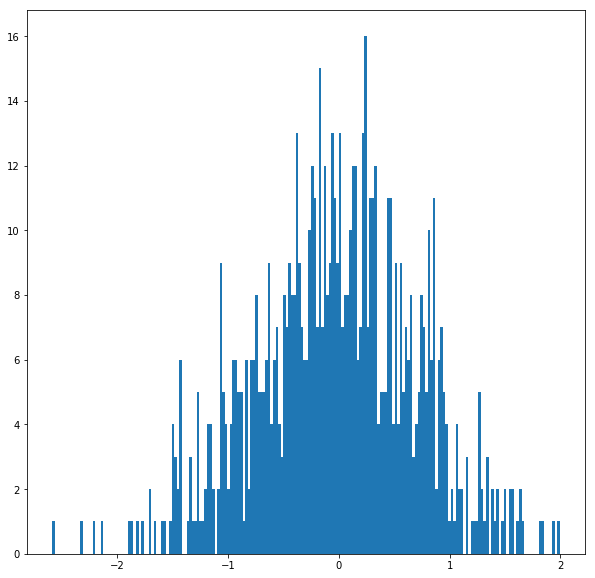

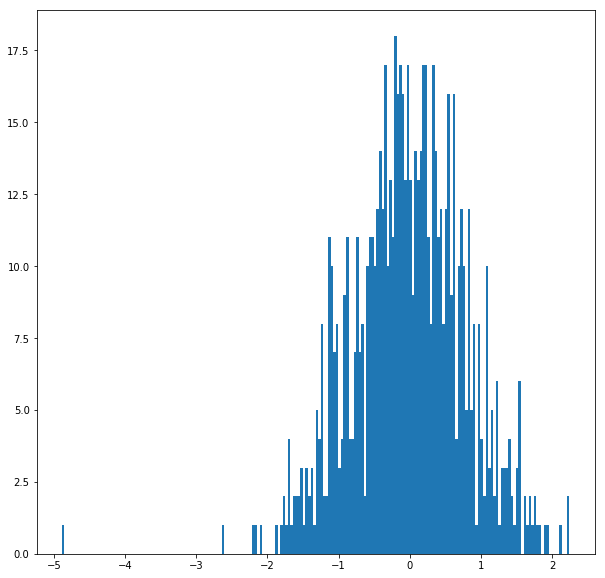

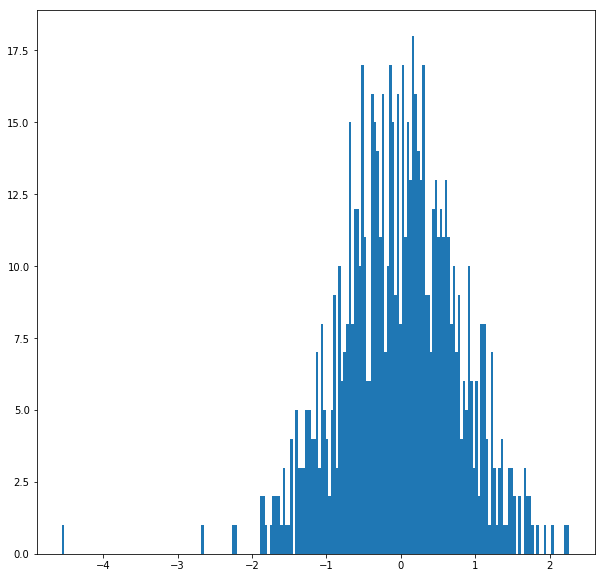

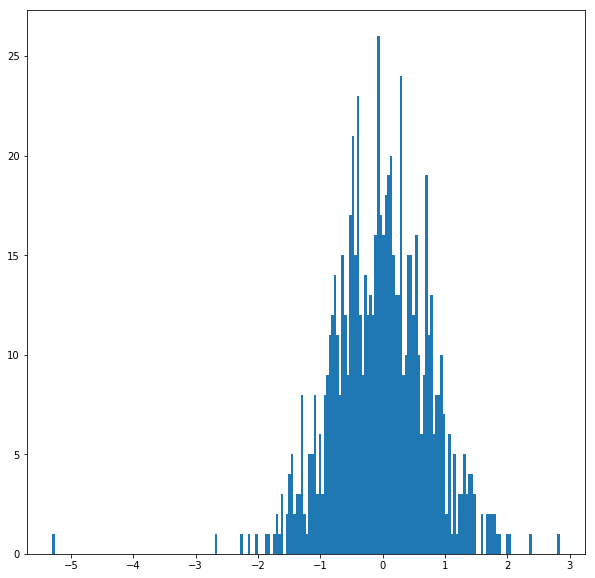

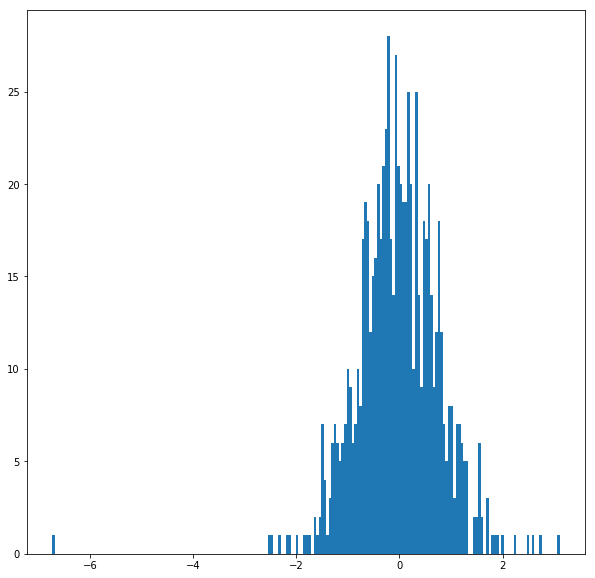

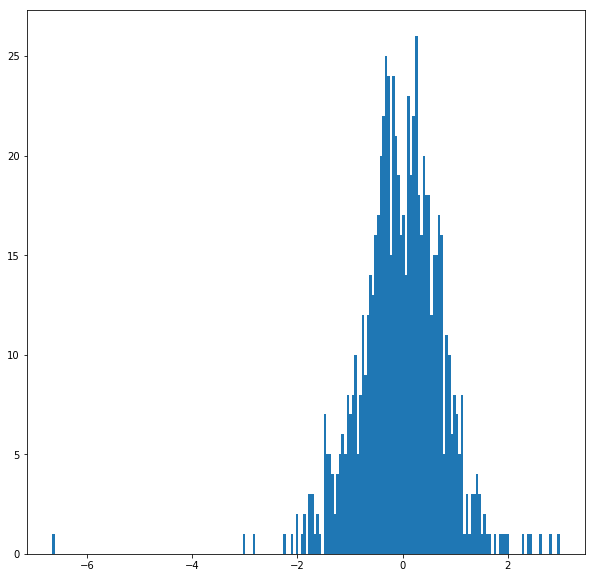

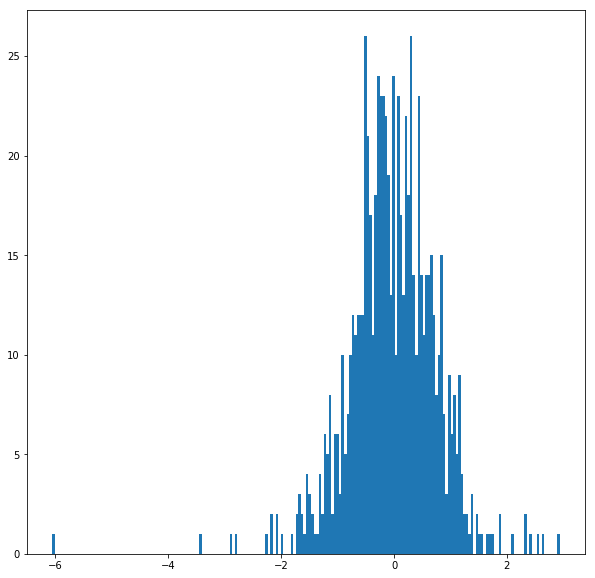

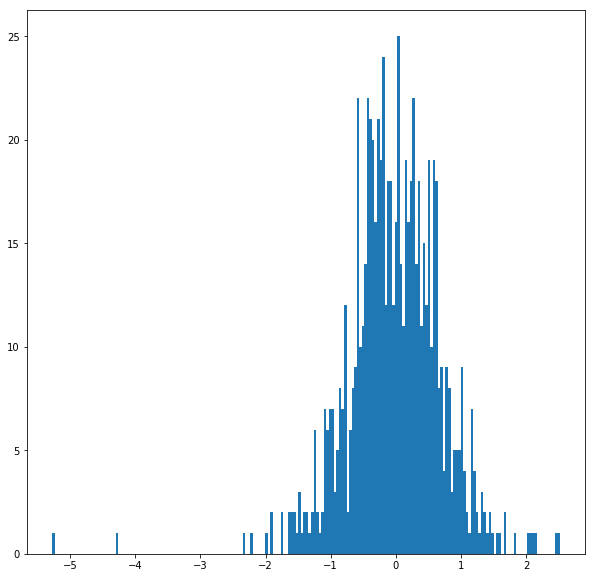

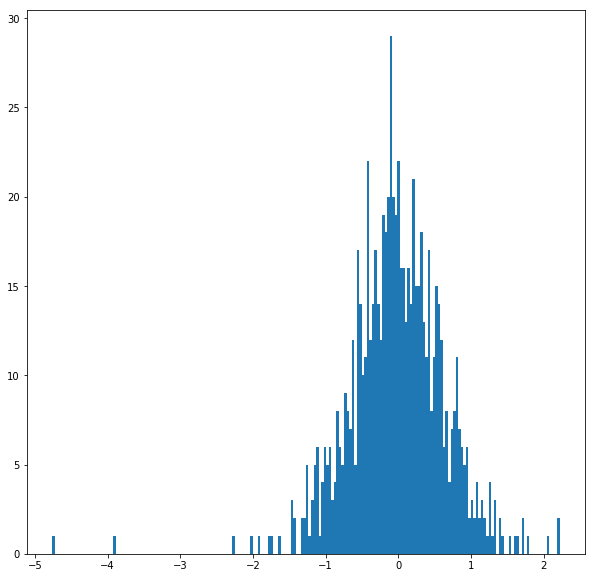

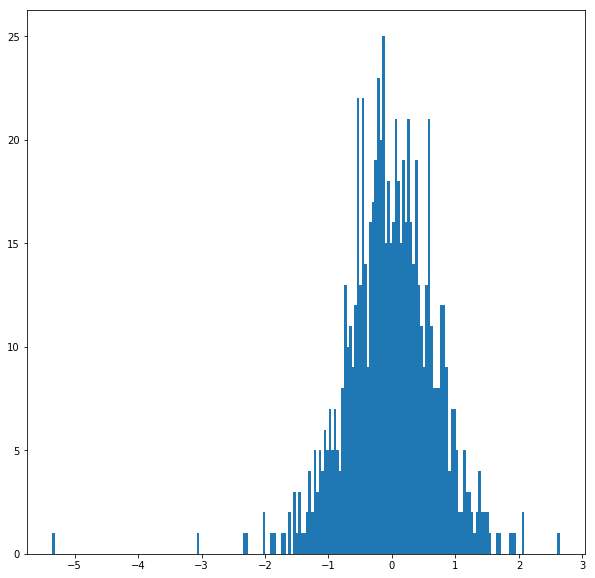

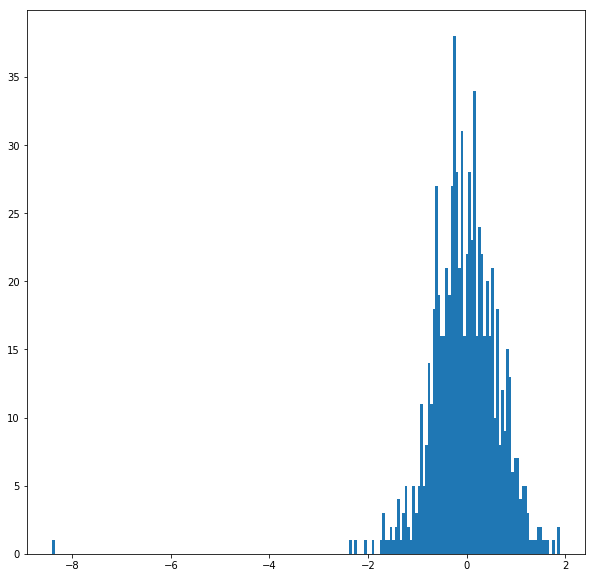

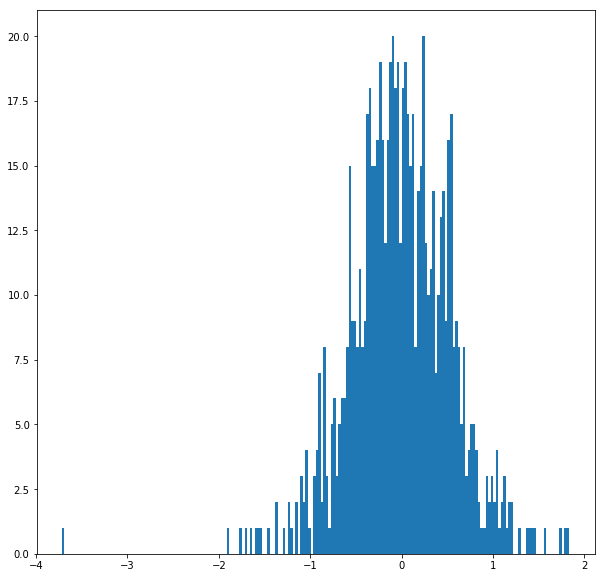

In [0]:
import time
token_i = 10
layer_i = 0
batch_i = 0
for layer_i in range(len(encoded_layers)):
    vec = encoded_layers[layer_i][batch_i][token_i]

    plt.figure(figsize=(10, 10))
    plt.hist(vec, bins=200)
    #plt.show()
   

In [0]:
token_embeddings = []

for token_i in range(len(tokenized_text)):
    hidden_layers = []
    
    for layer_i in range(len(encoded_layers)):
        vec = encoded_layers[layer_i][batch_i][token_i]
        
        hidden_layers.append(vec)
        
    token_embeddings.append(hidden_layers)

In [0]:
concatenated_last_4_layers = [torch.cat((layer[-1], layer[-2], layer[-3], layer[-4]), 0) for layer in token_embeddings]
summed_last_4_layers = [torch.sum(\
            torch.stack(layer)[-4:], 0) \
            for layer in token_embeddings]

In [0]:
sentence_embedding = torch.mean(encoded_layers[11], 1)

In [0]:
for i,x in enumerate(tokenized_text):
    print(i, x)

0 [CLS]
1 after
2 stealing
3 money
4 from
5 the
6 bank
7 vault
8 ,
9 the
10 bank
11 robber
12 was
13 seen
14 fishing
15 on
16 the
17 mississippi
18 river
19 bank
20 .
21 [SEP]


In [0]:
print("'bank' as in bank roberrer: ")
summed_last_4_layers[10][:15]

'bank' as in bank roberrer: 


tensor([ 1.1868, -1.5298, -1.3770,  1.0648,  3.1446,  1.4003, -4.2407,  1.3946,
        -0.1170, -1.8777,  0.1091, -0.3862,  0.6744,  2.1924, -4.5306])

In [0]:
print("'bank' as in bank vault ")
summed_last_4_layers[6][:15]

'bank' as in bank vault 


tensor([ 2.1319, -2.1413, -1.6260,  0.8638,  3.3173,  0.1796, -4.4853,  3.1215,
        -0.9740, -3.1780,  0.1046, -1.5481,  0.4758,  1.1703, -4.4859])

In [0]:
print("'bank' as in river bank: ")
summed_last_4_layers[19][:15]

'bank' as in river bank: 


tensor([ 1.1295, -1.4725, -0.7296, -0.0901,  2.4970,  0.5330,  0.9742,  5.1834,
        -1.0692, -1.5941,  1.9261,  0.7119, -0.9809,  1.2127, -2.9812])

In [0]:
from sklearn.metrics.pairwise import cosine_similarity

different_bank = cosine_similarity(summed_last_4_layers[10].reshape(1, -1), \
                                  summed_last_4_layers[19].reshape(1, -1))[0][0] 


same_bank = cosine_similarity(summed_last_4_layers[10].reshape(1, -1), \
                                  summed_last_4_layers[6].reshape(1, -1))[0][0]

In [0]:
print("bank roberrer to bank vault: ", same_bank)

bank roberrer to bank vault:  0.94567525


In [0]:
print('bank roberrer to river bank: ', different_bank)

bank roberrer to river bank:  0.6797334
